<a href="https://colab.research.google.com/github/viniciusfranca019/group-project-codenation/blob/main/Clusteriza%C3%A7%C3%A3o_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código de clusterização implementado conforme modelo disponivel no link abaixo:

[Find and Visualize clusters with K-Means](https://app.datacamp.com/workspace/w/2315d3ec-481c-4599-bc71-d2f32a961cbb/edit)

# Clusterização dos dados do mercado

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Drive_projeto_Codenation/OHE_df.csv').drop(columns=['Unnamed: 0'])

df.head()

,id,sg_uf_AC,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,natureza_juridica_macro_ADMINISTRACAO PUBLICA,natureza_juridica_macro_CARGO POLITICO,natureza_juridica_macro_ENTIDADES EMPRESARIAIS,natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS,natureza_juridica_macro_INSTITUICOES EXTRATERRITORIAIS,natureza_juridica_macro_OUTROS,natureza_juridica_macro_PESSOAS FISICAS,fl_rm_NAO,fl_rm_SIM,nm_segmento_ADMINISTRACAO PUBLICA DEFESA E SEGURIDADE SOCIAL,nm_segmento_AGRICULTURA PECUARIA PRODUCAO FLORESTAL PESCA E AQUICULTURA,nm_segmento_AGUA ESGOTO ATIVIDADES DE GESTAO DE RESIDUOS E DESCONTAMINACAO,nm_segmento_ALOJAMENTO E ALIMENTACAO,nm_segmento_ARTES CULTURA ESPORTE E RECREACAO,nm_segmento_ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEMENTARES,nm_segmento_ATIVIDADES FINANCEIRAS DE SEGUROS E SERVICOS RELACIONADOS,nm_segmento_ATIVIDADES IMOBILIARIAS,nm_segmento_ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,nm_segmento_COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS,nm_segmento_CONSTRUCAO,nm_segmento_EDUCACAO,nm_segmento_ELETRICIDADE E GAS,nm_segmento_INDUSTRIAS DE TRANSFORMACAO,nm_segmento_INDUSTRIAS EXTRATIVAS,nm_segmento_INFORMACAO E COMUNICACAO,nm_segmento_ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUICOES EXTRATERRITORIAIS,nm_segmento_OUTRAS ATIVIDADES DE SERVICOS,nm_segmento_SAUDE HUMANA E SERVICOS SOCIAIS,nm_segmento_SERVICOS DOMESTICOS,nm_segmento_TRANSPORTE ARMAZENAGEM E CORREIO,fl_spa_False,fl_spa_True,fl_antt_False,...,sg_uf_matriz_MT,sg_uf_matriz_PA,sg_uf_matriz_PB,sg_uf_matriz_PE,sg_uf_matriz_PI,sg_uf_matriz_PR,sg_uf_matriz_RJ,sg_uf_matriz_RN,sg_uf_matriz_RO,sg_uf_matriz_RR,sg_uf_matriz_RS,sg_uf_matriz_SC,sg_uf_matriz_SE,sg_uf_matriz_SP,sg_uf_matriz_TO,de_saude_tributaria_AMARELO,de_saude_tributaria_AZUL,de_saude_tributaria_CINZA,de_saude_tributaria_LARANJA,de_saude_tributaria_VERDE,de_saude_tributaria_VERMELHO,de_nivel_atividade_ALTA,de_nivel_atividade_BAIXA,de_nivel_atividade_MEDIA,de_nivel_atividade_MUITO BAIXA,fl_matriz,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,True,14.457534,False,False,False,False,False,False,True,True,0.0,0.0,3132172.8,3132172.8,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,True,1.463014,False,False,False,True,False,False,True,True,0.0,0.0,210000.0,210000.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,True,7.093151,False,False,False,True,False,False,False,True,0.0,0.0,50000.0,50000.0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,True,6.512329,False,False,False,False,False,False,True,True,0.0,0.0,210000.0,210000.0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,True,3.200000,False,False,False,False,False,False,True,True,0.0,0.0,210000.0,210000.0,0


In [10]:
# g = sns.PairGrid(df)
# g.map(sns.scatterplot);
df_without_id = df.drop(columns=['id'])

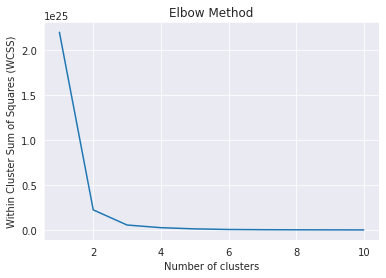

In [11]:
X = np.array(df_without_id)
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    model.fit(X)                              
    wcss.append(model.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()


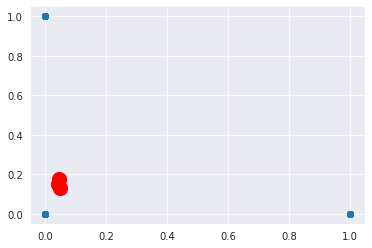

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
pred_y = kmeans.fit_predict(X)


# Plot the data
plt.scatter(X[:,0], X[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()